In [62]:
unaccepted_cases = '{}/{}'.format(base_path,'1_timingDistributionOfBigHints/part-00000-cc3a6cbd-8cba-477b-a61a-1dbb0099dabe-c000.csv')
pos_accepted_cases = '{}/{}'.format(base_path,'AcceptedCases/singleOutput/allPositive/part-00000-4259c50f-1754-4c60-b27f-8cabb6220d52-c000.csv')
neg_accepted_cases= '{}/{}'.format(base_path,'AcceptedCases/singleOutput/allNegative/part-00000-8403ccf6-a50b-486d-ae03-2a05f087e604-c000.csv')

In [63]:
import pandas as pd
ua_cases_df = pd.read_csv(unaccepted_cases)
ua_cases_df.head()
#ua_cases_df['hour'].sum()

,_id,hour,week_day
0,05O55G5455QNL4JTP4J055PQ,21,Wed
1,05O55G5455QNO4OTP4T055PQ,5,Sun
2,05O55G5455QOG40TP4T055P5,6,Tue
3,05O55G5455QOL4QTP44055P4,5,Sat
4,05O55G5455QOQ4LTP45055PG,4,Mon


In [92]:
a_pos_df = pd.read_csv(pos_accepted_cases)
a_pos_df.head()

,_id,hour,week_day
0,040NNN4O55T5TTQTP40O5TPL,2,Thu
1,040NNN4O55T5TTQTP40O5TPL,4,Sat
2,040T0J5J5QJ0TTJTP4045TPN,3,Thu
3,04JG4JO45N5JTOQTP4JT5TPQ,7,Wed
4,04JG4JO45N5JTOQTP4JT5TPQ,3,Thu


In [93]:
a_neg_df = pd.read_csv(neg_accepted_cases)
a_neg_df.head()

,_id,hour,week_day
0,040Q0TG55GOTT5JTP4GO5TPT,5,Tue
1,05G4JQGO50TGTT4TP4O4TTPG,22,Tue
2,05G4JQGO50TGTT4TP4O4TTPG,1,Mon
3,05NOG0J454G444LTP44N5TPJ,22,Sat
4,05O5505455Q0O4NTP4Q055P4,23,Sun


In [177]:
ua_df = ua_cases_df[['_id','hour']]
ua_hour_count_df = ua_df.groupby('hour').size().reset_index(name='ua_count')
ua_hour_count_df.head()
#ua_hour_count_df['ua_count'].sum()

,hour,ua_count
0,0,279285
1,1,293157
2,2,324724
3,3,348084
4,4,325444


In [178]:
a_pos_df =a_pos_df[['_id','hour']]
a_pos_hour_count_df = a_pos_df.groupby('hour').size().reset_index(name='a_pos_count')
a_pos_hour_count_df.head()

,hour,a_pos_count
0,0,215
1,1,218
2,2,263
3,3,322
4,4,273


In [179]:
a_neg_df =a_neg_df[['_id','hour']]
a_neg_hour_count_df = a_neg_df.groupby('hour').size().reset_index(name='a_neg_count')
a_neg_hour_count_df.head()

,hour,a_neg_count
0,0,100
1,1,122
2,2,118
3,3,139
4,4,117


In [180]:
result_df = pd.concat([ua_hour_count_df, a_pos_hour_count_df,a_neg_hour_count_df], axis=1)
result_df = result_df[['hour','ua_count','a_pos_count','a_neg_count']]
result_df=result_df.T.drop_duplicates().T
result_df.head()

,hour,ua_count,a_pos_count,a_neg_count
0,0,279285,215,100
1,1,293157,218,122
2,2,324724,263,118
3,3,348084,322,139
4,4,325444,273,117


In [181]:
result_df.columns

Index(['hour', 'ua_count', 'a_pos_count', 'a_neg_count'], dtype='object')

In [182]:
result_df['sum'] = result_df[['ua_count','a_pos_count','a_neg_count']].sum(axis=1)
#result_df.head()
result_df.head()

,hour,ua_count,a_pos_count,a_neg_count,sum
0,0,279285,215,100,279600
1,1,293157,218,122,293497
2,2,324724,263,118,325105
3,3,348084,322,139,348545
4,4,325444,273,117,325834


In [183]:
result_df['ua_perc']= round(result_df['ua_count']/result_df['sum'] * 100,4)
result_df['a_pos_perc']= round(result_df['a_pos_count']/result_df['sum'] * 100,4)
result_df['a_neg_perc']= round(result_df['a_neg_count']/result_df['sum'] * 100,4)
result_df= result_df[['hour','ua_perc','a_neg_perc','a_pos_perc']]
result_df

,hour,ua_perc,a_neg_perc,a_pos_perc
0,0,99.8873,0.0358,0.0769
1,1,99.8842,0.0416,0.0743
2,2,99.8828,0.0363,0.0809
3,3,99.8677,0.0399,0.0924
4,4,99.8803,0.0359,0.0838
5,5,99.8727,0.0413,0.0860
6,6,99.8757,0.0404,0.0839
7,7,99.8653,0.0479,0.0868
8,8,99.8764,0.0419,0.0818
9,9,99.8817,0.0327,0.0856


In [184]:
staced_by_perc = (
    # bring the date back as a column to use as a grouping var
    result_df
    # make a long DF of date/column/name value
    .melt(id_vars='hour')
    # order DF by highest values first
    .sort_values('value',ascending=True)
    # group by the index and take the first 3 rows of each
    .groupby('hour')
    .head(3)
    # pivot back so we've got an X & Y to chart...
    .pivot('hour', 'variable')
    # drop the value level as we don't need that
    #.droplevel(level=0, axis=1)
)
staced_by_perc


value                    
variable a_neg_perc a_pos_perc  ua_perc
hour                                   
0            0.0358     0.0769  99.8873
1            0.0416     0.0743  99.8842
2            0.0363     0.0809  99.8828
3            0.0399     0.0924  99.8677
4            0.0359     0.0838  99.8803
5            0.0413     0.0860  99.8727
6            0.0404     0.0839  99.8757
7            0.0479     0.0868  99.8653
8            0.0419     0.0818  99.8764
9            0.0327     0.0856  99.8817
10           0.0393     0.1144  99.8463
11           0.0491     0.1003  99.8506
12           0.0415     0.1244  99.8342
13           0.0711     0.1289  99.8000
14           0.0513     0.1540  99.7947
15           0.0530     0.1189  99.8280
16           0.0498     0.1100  99.8403
17           0.0366     0.0850  99.8784
18           0.0408     0.0860  99.8732
19           0.0369     0.0808  99.8823
20           0.0417     0.0838  99.8745
21           0.0272     0.0739  99.8989
22           0.0314     0.0695  99.8992
23           0.0365     0.0767  99.8868

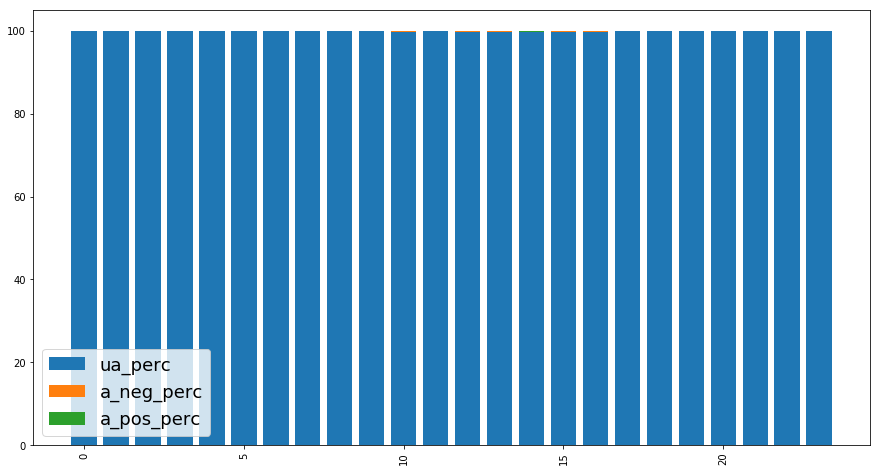

In [186]:

# If it's not already a datetime
cumval=0
fig = plt.figure(figsize=(15,8))
for col in result_df.columns[~result_df.columns.isin(['hour'])]:
    plt.bar(result_df.hour, result_df[col], bottom=cumval, label=col)
    cumval = cumval+result_df[col]

_ = plt.xticks(rotation=90)
_ = plt.legend(fontsize=18)